In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data/customer_segments_labeled.csv", header=None)

df.head()

,0,1,2,3,4
0,14646,280206.02,74,3786.57,High Value
1,18102,259657.30,60,4327.62,High Value
2,17450,194550.79,46,4229.37,High Value
3,16446,168472.50,2,84236.25,High Value
4,14911,143825.06,201,715.55,High Value


In [7]:
df.columns = ["CustomerID", "TotalSpend", "OrderCount", "AvgOrderValue", "CustomerSegment"]

df.head()

,CustomerID,TotalSpend,OrderCount,AvgOrderValue,CustomerSegment
0,14646,280206.02,74,3786.57,High Value
1,18102,259657.30,60,4327.62,High Value
2,17450,194550.79,46,4229.37,High Value
3,16446,168472.50,2,84236.25,High Value
4,14911,143825.06,201,715.55,High Value


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4339 non-null   int64  
 1   TotalSpend       4339 non-null   float64
 2   OrderCount       4339 non-null   int64  
 3   AvgOrderValue    4339 non-null   float64
 4   CustomerSegment  4339 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 169.6+ KB


In [9]:
segment_revenue = df.groupby("CustomerSegment")["TotalSpend"].sum()

segment_revenue

CustomerSegment
High Value      7563215.20
Low Value        318600.33
Medium Value    1029592.37
Name: TotalSpend, dtype: float64

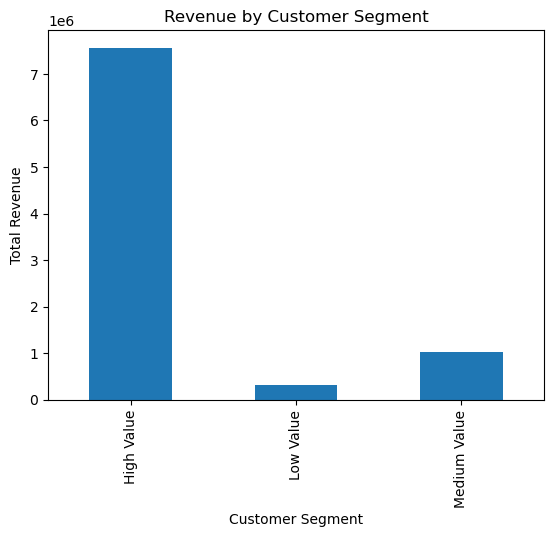

In [10]:
plt.figure()
segment_revenue.plot(kind='bar')
plt.title("Revenue by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue")
plt.show()

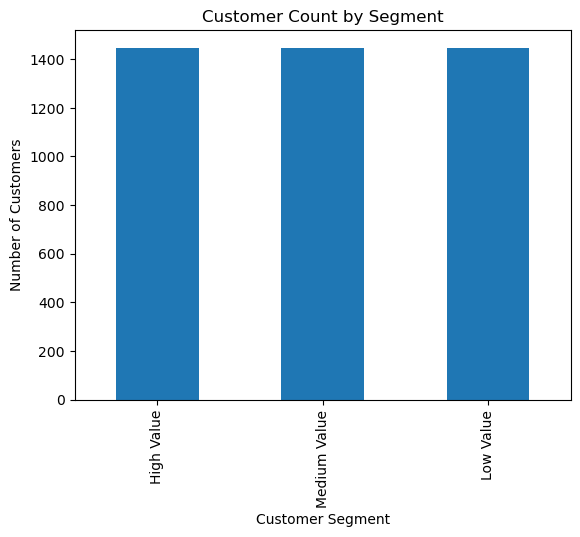

In [11]:
segment_counts = df["CustomerSegment"].value_counts()

plt.figure()
segment_counts.plot(kind='bar')
plt.title("Customer Count by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

In [12]:
revenue_percentage = 100 * segment_revenue / segment_revenue.sum()

revenue_percentage

CustomerSegment
High Value      84.871159
Low Value        3.575196
Medium Value    11.553644
Name: TotalSpend, dtype: float64

In [13]:
segment_aov = df.groupby("CustomerSegment")["AvgOrderValue"].mean()

segment_aov

CustomerSegment
High Value      723.113089
Low Value       184.332524
Medium Value    349.488873
Name: AvgOrderValue, dtype: float64

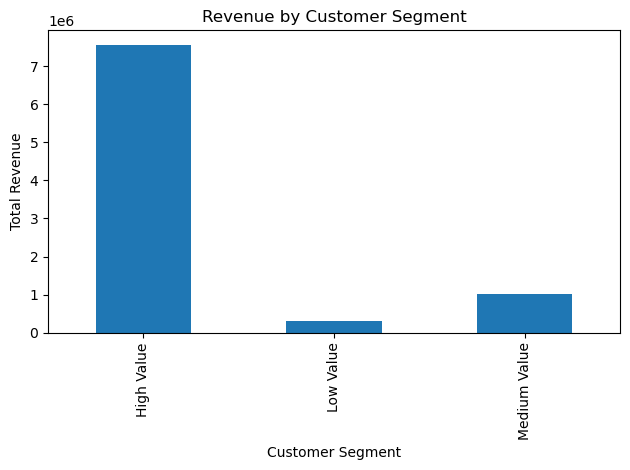

In [14]:
plt.figure()
segment_revenue.plot(kind='bar')
plt.title("Revenue by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.savefig("revenue_by_segment.png")
plt.show()

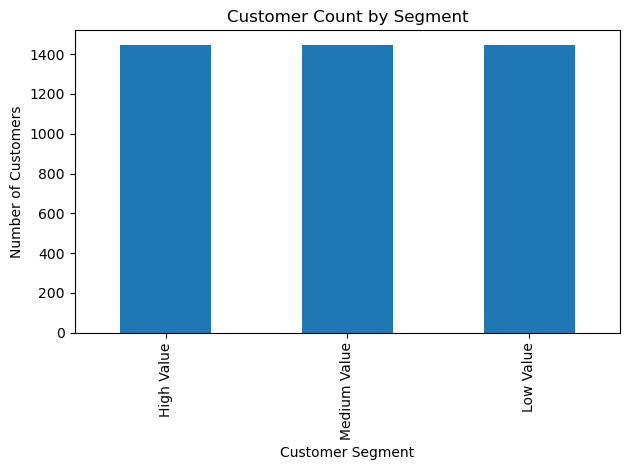

In [15]:
plt.figure()
segment_counts.plot(kind='bar')
plt.title("Customer Count by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.savefig("customer_count_by_segment.png")
plt.show()